In [1]:
import time

import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
import utils

# Autoregressive (AR) LSTM

## Dataset

Removed inlet and outlet fan speed due to the fact that auto-regression requires all features as inputs and outputs to predict.

In [2]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time').drop(['inlet_fan_speed', 'outlet_fan_speed'], axis=1)

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = None # all columns
feature_count = len(case_1.columns)

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Model creation

In [5]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
# features_size = len(label_columns)

In [6]:
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [7]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-11 13:11:44.136483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:11:44.136614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [9]:
exec_times = {}

In [10]:
results = {}

## Case 2

In [11]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-11 13:11:44.549455: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-11 13:11:45.993080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-11 13:11:49.016618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell (LSTMCell)        multiple                  38784     
                                                                 
 rnn (RNN)                   multiple                  38784     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  8910      
                                                                 
Total params: 47,694
Trainable params: 47,694
Non-trainable params: 0
_________________________________________________________________


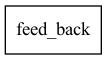

In [13]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-10-11 13:12:12.121076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


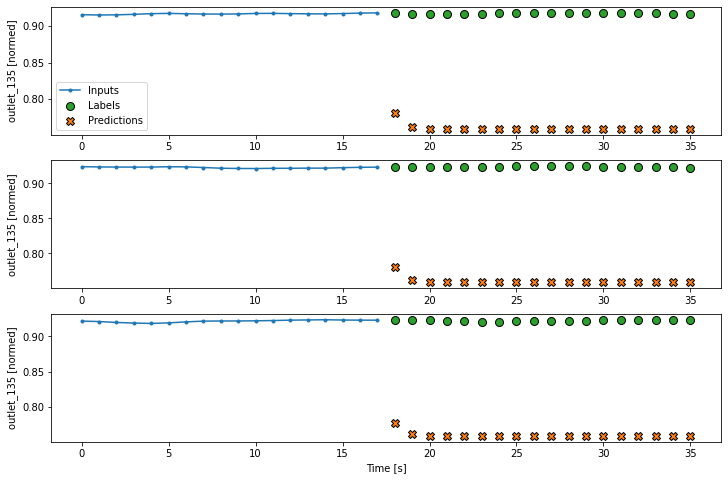

In [14]:
window.plot(feedback_model, plot_col="outlet_135")

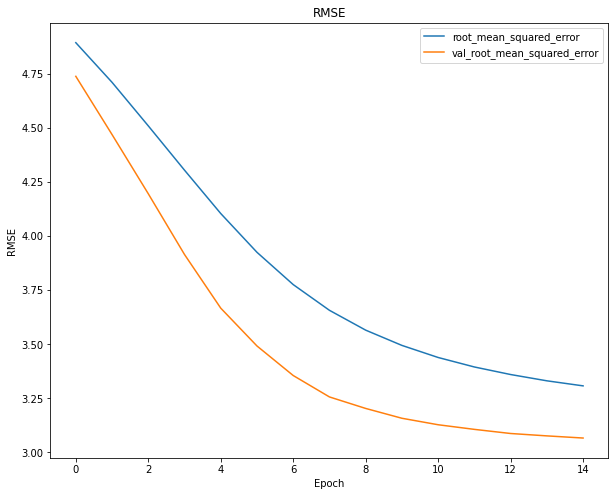

In [15]:
utils.plot_losses(history=history)

In [16]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [17]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

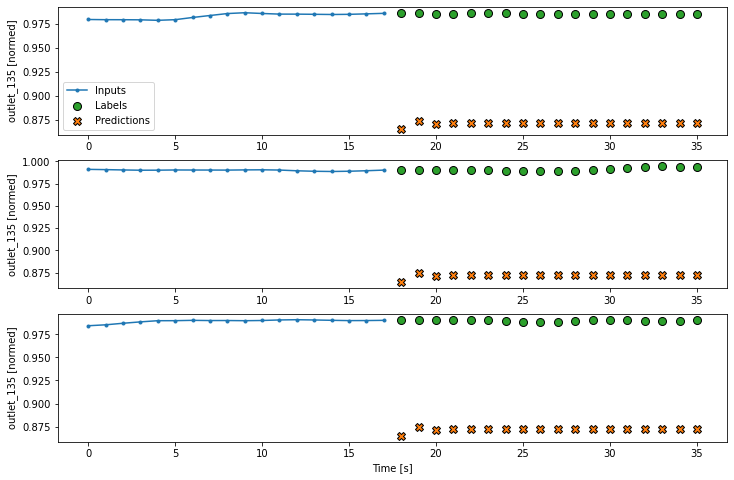

In [18]:
window.plot(feedback_model, plot_col="outlet_135")

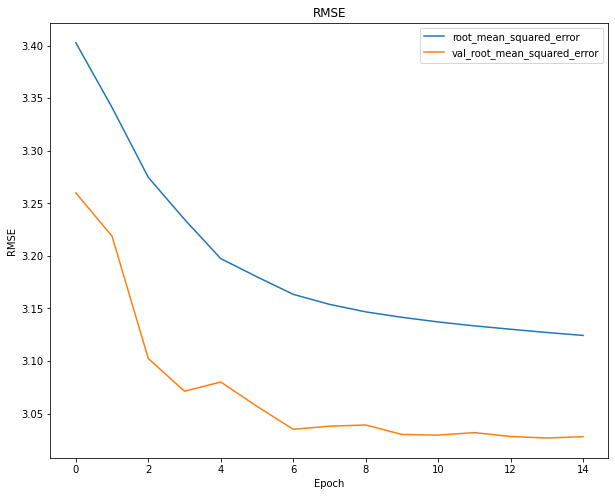

In [19]:
utils.plot_losses(history=history)

In [20]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [21]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_4'] = time.time() - start_t

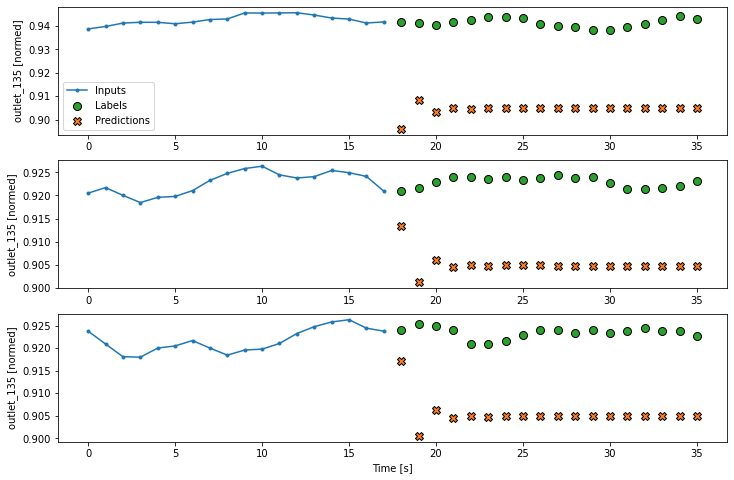

In [22]:
window.plot(feedback_model, plot_col="outlet_135")

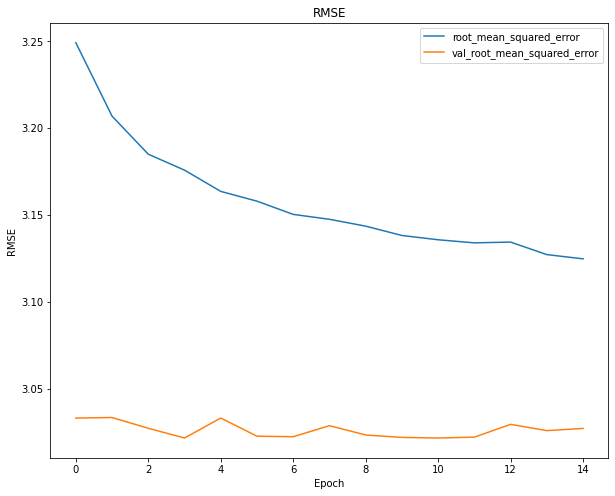

In [23]:
utils.plot_losses(history=history)

In [24]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [25]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=feedback_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

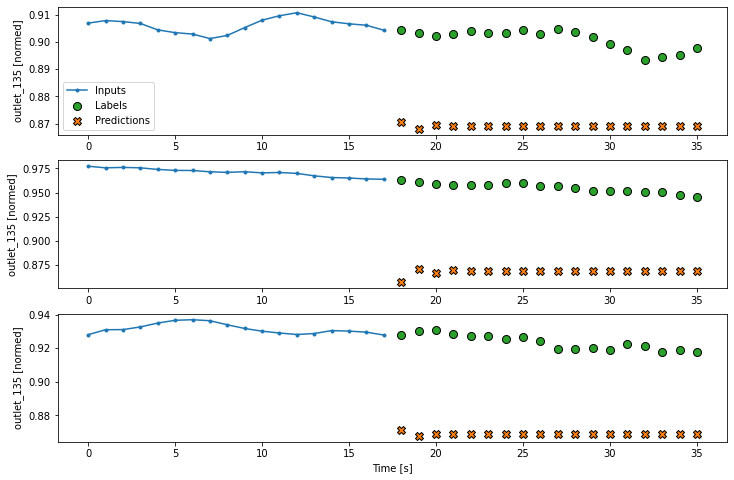

In [26]:
window.plot(feedback_model, plot_col="outlet_135")

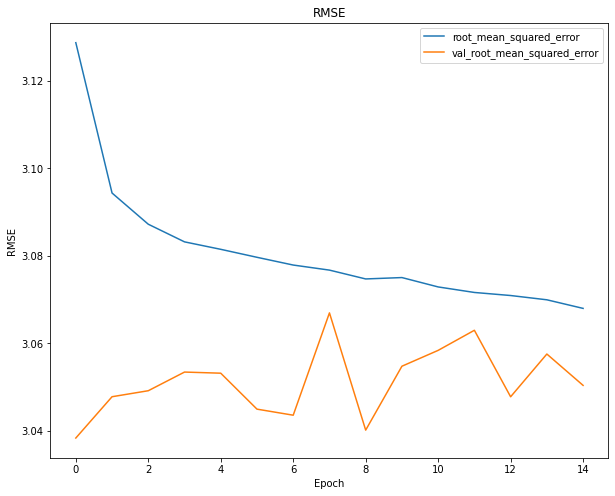

In [27]:
utils.plot_losses(history=history)

In [28]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [29]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    # label_columns=label_columns
)

test_res = feedback_model.evaluate(window.train) # Testing

5/5 [==============================] - 0s 103ms/step - loss: 0.0362 - root_mean_squared_error: 0.2149


In [30]:
results['test'] = {
    'loss': utils.inverse_transform_loss(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

In [31]:
pd.DataFrame(results).transpose().round(4)

,loss,rmse,val_loss,val_rmse
case_2,10.5285,3.3075,9.3310,3.0662
case_3,9.6091,3.1244,9.1502,3.0281
case_4,9.6111,3.1247,9.1453,3.0271
case_5,9.3389,3.0680,9.2564,3.0504
test,9.9497,3.1922,NaN,NaN


In [32]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,26.95
case_3,29.76
case_4,51.62
case_5,112.31


In [33]:
print("Total training time: %.2fs" % exec_times_df['Time'].sum())

Total training time: 220.65s
